Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [1]:
# Import libraries for data processing
# -----------------------------------------------------------------------
import pandas as pd  # Pandas for data manipulation and analysis in Python.

# Optional libraries (can be removed if not used):
# -----------------------------------------------------------------------
# Import libraries for web scraping and data manipulation
# from bs4 import BeautifulSoup
# import requests

# Import libraries for web browser automation with Selenium
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

# ChromeDriverManager manages the installation of the Chrome driver

# from selenium.webdriver.common.keys import Keys  # Keys is useful for simulating keyboard events in Selenium.
# from selenium.webdriver.support.ui import Select  # Select is used to interact with <select> elements on web pages.

# Import libraries for pausing execution
# -----------------------------------------------------------------------
# from time import sleep  # Sleep is used to pause the program execution for a number of seconds.

# Configurations
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Set a Pandas option to show all columns of a DataFrame.

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.options.display.max_columns = None

pd.set_option('display.float_format', '{:.2f}'.format)

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
def open_csv(ruta):
  """
  Opens a CSV file and reads it into a pandas DataFrame.

  Args:
      ruta (str): The path to the CSV file.

  Returns:
      pd.DataFrame: The DataFrame containing the data from the CSV file.
  """

  # Read the CSV file using pandas.read_csv
  df = pd.read_csv(ruta)

  # Return the DataFrame
  return df


In [3]:
# Creation of a function to explore the DataFrames
def explore_df(df):
    """
    This function allows to make an initial data exploration. 

    Args:
      df (pandas.DataFrame): The DataFrame to explore. Refering to the ones previously opened. 

    Returns:
      None  
      """
    # Prints information about the DataFrame
    print("The main information for DataFrame is: ")
    df.info()
    print("______________________")
    # Print the first 5 rows of the DataFrame
    print(f"The first 5 rows for DataFrame are:")
    display(df.head())


In [4]:
# Define a function to explore basic characteristics of each column in a DataFrame
def explore_columns(df):
   """
   Explores basic characteristics of each column in a DataFrame.

   Args:
       df (pd.DataFrame): The DataFrame to explore.

   Prints:
       Description of each column, including:
           - Number of values
           - Unique values
           - Data type
           - Number of null values
           - Number of duplicates
   """

   for column in df.columns:
       # Print a header for the current column
       print(f"-------- Exploring {column} --------")

       # Print the number of values in the column
       print(f"Number of values: {len(df[column].to_list())}")

       # Print the number of unique values in the column
       print(f"Unique values: {len(df[column].unique())}")

       # Print the data type of the column
       print(f"Data type: {df[column].dtypes}\n")

       # Print the number of null values in the column
       print(f"Total nulls: {df[column].isnull().sum()}")

       # Print the number of duplicate values in the column
       print(f"Duplicates: {df[column].duplicated().sum()}")

       # Add a space for readability
       print("__________________________")



In [5]:
# Define a function to obtain information about a DataFrame
def df_information(df):

    # Print the shape of the DataFrame (number of rows and columns)
    print(f"The shape for the DataFrame is: ")
    print(df.shape)
    print("_________________")

    # Print the list of column names
    print(f"The name of the columns are: {list(df.columns)}")
    print("_________________")

    # Print the number of null values in each column
    print(f"The number of nulls in the DataFrame:")
    print(df.isna().sum())
    print("_________________")

    # Print the number of duplicate rows in the DataFrame
    print(f"The number of values duplicated in the DataFrame:")
    print(df.duplicated().sum())
    print("_________________")

    # Print the transposed descriptive statistics (descriptive statistics for each column)
    print(f"The descriptive statistics for this DataFrame are:")
    display(df.describe().T) 



In [6]:
def change_datatype(df, column):
  """
  Changes the data type of a column in a DataFrame.

  Args:
      df (pd.DataFrame): The DataFrame containing the column.
      column (str): The name of the column to change the data type.

  Returns:
      pd.DataFrame: The DataFrame with the modified data type for the specified column.
  """

  # Check if the column is currently of type 'object' (string)
  if df[column].dtype == 'object':
    # Try to convert the column to numeric data type
    try:
      df[column] = pd.to_numeric(df[column])
      print(f"Column '{column}' successfully converted to numeric.")  # Added message
    except:
      # If conversion fails, do nothing (pass)
      print(f"Failed to convert column '{column}' to numeric.")  # Added message
  # Otherwise, if the column is currently numeric (int64)
  elif df[column].dtype == 'int64':
    # Convert the column to 'object' data type (string)
    df[column] = df[column].astype('object')
    print(f"Column '{column}' converted to object.")  # Added message
  
  return df


In [7]:
# Returns a list including the columns with nulls
def filtering_nulls(df):
    columns_with_nulls = []
    # Iterates through each column in the DataFrame
    for column in df.columns:
        # Check if the column has any null values using 'isnull().any()'
        if df[column].isnull().any():
            # If null are found, appends the column name to the list
            columns_with_nulls.append(column)
    # Returns the list of columns with nulls
    return columns_with_nulls


NameError: name 'loyalty' is not defined

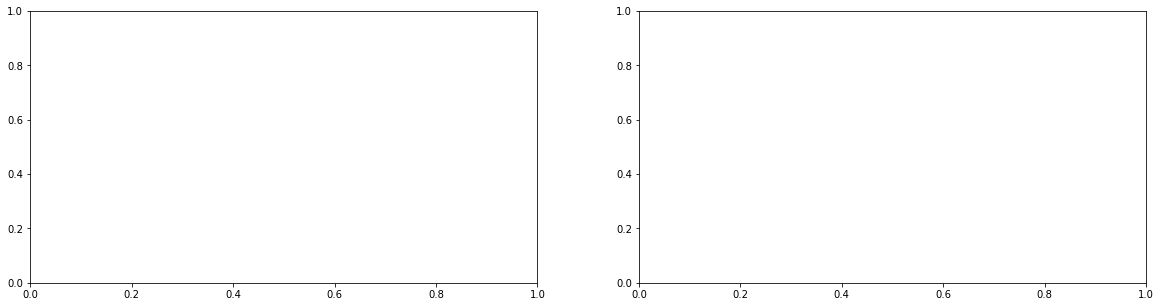

In [8]:
# Creates a figure and two subplots (1 row, 2 columns) with a size of 20x5 inches

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Creates a boxplot on the first subplot
sns.boxplot(y = "Salary",
            data = loyalty, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

axes[0].set_title("Boxplot usando la columna `salary'")



# Creates a violinplot on the second subplot
sns.violinplot(y = "Salary",
               data = loyalty, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2, 
               ax = axes[1])


axes[1].set_title("Violinplot usando la columna `salary'")



In [ ]:
def iterative_imputer(df, column):
  """
  Imputes missing values in a column using an iterative imputer.

  Args:
      df (pd.DataFrame): The DataFrame containing the column.
      column (str): The name of the column to impute missing values.

  Returns:
      pd.Series: The imputed column.
  """

  # Create an iterative imputer with 20 iterations and a random state of 42
  imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

  # Fit and transform the data in the column
  imputer_iterative_imputed = imputer_iterative.fit_transform(df[column])

  # Check that the output is an array
  assert isinstance(imputer_iterative_imputed, np.ndarray), "Output is not an array."

  # Update the column with the imputed values
  df[column] = imputer_iterative_imputed

  # Return the imputed column
  return df[column]


In [ ]:

#instanciamos la clase del KNNImputer
#imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
#imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Salary"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
#imputer_knn_imputado

In [ ]:
df_copia.describe()[["Salary","Salary_iterative"]].T #vamos a usar la media normal 79359.34	

,count,mean,std,min,25%,50%,75%,max
Salary,12499.00,79359.34,34749.69,9081.00,59246.50,73455.00,88517.50,407228.00
Salary_iterative,16737.00,79359.34,30029.31,9081.00,63899.00,79359.34,82940.00,407228.00


In [ ]:
loyalty["Salary"] = (loyalty["Salary"].fillna(loyalty["Salary"].mean())).astype(int)

In [ ]:
activity["Points Accumulated"] = activity["Points Accumulated"].astype(int)

In [ ]:
loyalty = loyalty.drop(columns=["Cancellation Year", "Cancellation Month"])

In [ ]:
loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,79359,Divorced,Star,3839.61,Standard,2016,3
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,79359,Single,Star,3839.75,Standard,2014,7
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,79359,Single,Star,3839.75,Standard,2013,2
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,79359,Married,Star,61850.19,Standard,2012,12
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210,Married,Star,67907.27,Standard,2014,9
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,79359,Single,Star,74228.52,Standard,2014,3
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,57297,Married,Star,10018.66,2018 Promotion,2018,4


In [ ]:
def merge_dataframes(df1, df2, how="inner", on=None): # this is the same as calling directly df1.merge(df2, how, on)
  """
  Merges two DataFrames based on specified parameters.

  Args:
      df1 (pd.DataFrame): The first DataFrame to merge.
      df2 (pd.DataFrame): The second DataFrame to merge.
      how (str, optional): The type of merge to perform. Defaults to "inner".
          Valid options include:
              - "inner": Keep only rows with a match in both DataFrames.
              - "left": Keep all rows from the left DataFrame, with matching rows from the right DataFrame.
              - "right": Keep all rows from the right DataFrame, with matching rows from the left DataFrame.
              - "outer": Keep all rows from both DataFrames.
      on (str or list, optional): The column(s) to use for joining the DataFrames. 
          Defaults to None (uses columns with the same name in both DataFrames).

  Returns:
      pd.DataFrame: The merged DataFrame.
  """
  # Validate how argument
  valid_how_options = ["inner", "left", "right", "outer"]
  if how not in valid_how_options:
    raise ValueError(f"Invalid 'how' argument. Valid options are: {', '.join(valid_how_options)}")

  # Perform the merge
  return df1.merge(df2, how=how, on=on)


In [ ]:
def standarize_column_names(df):
  """
  Standarize column names in a DataFrame by converting them to lowercase and replacing spaces with underscores.

  Args:
      df (pd.DataFrame): The DataFrame to modify.

  Returns:
      pd.DataFrame: The DataFrame with unified column names.
  """

  # Convert all column names to lowercase
  df.columns = df.columns.str.lower()  # Apply lowercase to all column names

  # Replace spaces in column names with underscores
  df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores

  return df
